In [1]:
import requests
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#note everyone will have a different client_id and client_secret
spotipy_client_id = 'CLIENT_ID'
spotipy_client_secret = 'SECRET_ID'
spotipy_redirect_uri = 'URI'
scope = 'user-top-read'

In [4]:
sp = spotipy.Spotify(auth_manager = SpotifyOAuth(client_id = spotipy_client_id, 
                                                client_secret = spotipy_client_secret, 
                                                redirect_uri = spotipy_redirect_uri,
                                                scope = scope))

#### Get album IDs

In [5]:
#get albums for 1D
artist = sp.artist_albums('4AK6F7OLvEQ5QYCBNiQWHq', album_type='album')

In [6]:
#get album id for made in the AM

AM_id = artist['items'][0]['id']
AM_id

'1gMxiQQSg5zeu4htBosASY'

In [7]:
four_id = artist['items'][1]['id']
four_id

'4gCNyS7pidfK3rKWhB3JOY'

In [8]:
midnight_id = artist['items'][2]['id']
midnight_id

'7p1fX8aUySrBdx4WSYspOu'

In [9]:
home_id = artist['items'][3]['id']
home_id

'2sWX3HYnZjPZ9MrH6MFsBt'

In [10]:
up_id = artist['items'][4]['id']
up_id

'6cunQQ7YZisYOoiFu2ywIq'

#### Get Track Info for each Album

In [11]:
#tracks for up all night
up_tracks = sp.album_tracks('6cunQQ7YZisYOoiFu2ywIq')
#up_tracks

In [12]:
# tracks for Take Me Home
home_tracks = sp.album_tracks('2sWX3HYnZjPZ9MrH6MFsBt')
#home_tracks

In [13]:
# tracks for Midnight Memories
midnight_tracks = sp.album_tracks('7p1fX8aUySrBdx4WSYspOu')


In [14]:
# tracks for FOUR
four_tracks = sp.album_tracks(four_id)

In [15]:
# tracks for Made in the AM
AM_tracks = sp.album_tracks(AM_id)

#### Get Track IDs for all Albums

In [16]:
#function to get track ids for album
def get_track_ids(album):
    track_ids=[]
    for song in album['items']:
        track_ids.append(song['id'])
    return track_ids

In [17]:
#all track ids for up all night
up_track_ids = get_track_ids(up_tracks)
up_track_ids

['4cluDES4hQEUhmXj6TXkSo',
 '3jJ5NJ3aNWvV70Rd7hgZIH',
 '5G2c6FsfTzgYUzageCmfXY',
 '0UAB340gAcSMk3r0a8PTag',
 '1I93YiKgu2P5pwprWmziPI',
 '5bODPM8nTwwTIE4W9fuUcC',
 '6N5ruusDFjQPYvCka8ejwP',
 '4K0M12PIWJjA4H0NAP142y',
 '5MIMD5WMooNWe8QsMqCrE8',
 '2EpTKW1O5Zmok99BzQOi9D',
 '46qPfZshPjoitCKdKVD6k7',
 '41PiyIwNrzoLn598y2glGY',
 '1KNEo25B740JX8ZcphK4Xm',
 '147ximWPJObFNQ4M1AhFox',
 '3MxJGBnYaP4yQYUv90HLqZ',
 '6xnh4eQ4poVpqQBacETxia',
 '5fEql5cR2hjR6wPGUPiEEb',
 '4yVPaA6DOfwbqZIQNv4G5U']

In [18]:
home_track_ids = get_track_ids(home_tracks)
midnight_track_ids = get_track_ids(midnight_tracks)
four_track_ids = get_track_ids(four_tracks)
AM_track_ids = get_track_ids(AM_tracks)

In [19]:
#combine all track ids into one list
all_1d_tracks = up_track_ids + home_track_ids + midnight_track_ids + four_track_ids + AM_track_ids

#### Get General Info About Each Track

In [20]:
#get track info
def get_track_features(id):
    meta=sp.track(id)
    #meta
    track_id= meta['id']
    name = meta['name']
    album = meta['album']['name']
    artist = meta['album']['artists'][0]['name']
    spotify_url = meta['external_urls']['spotify']
    album_cover = meta['album']['images'][0]['url']
    track_info= [track_id, name, album, artist, spotify_url, album_cover]
    return track_info

In [21]:
get_track_features('4cluDES4hQEUhmXj6TXkSo')

['4cluDES4hQEUhmXj6TXkSo',
 'What Makes You Beautiful',
 'Up All Night',
 'One Direction',
 'https://open.spotify.com/track/4cluDES4hQEUhmXj6TXkSo',
 'https://i.scdn.co/image/ab67616d0000b2734a5584795dc73860653a9a3e']

In [22]:
#loop over track ids to get df of all tracks
#time.sleep(.5) means sleep in between each track
track_info = []
for i in range (len(all_1d_tracks)):
    time.sleep(.5)
    track = get_track_features(all_1d_tracks[i])
    track_info.append(track)

In [23]:
#track_info

In [24]:
# Create DF of track_info
track_info_df = pd.DataFrame(track_info, columns = ['track_id', 'name', 'album', 'artist', 'spotify_url', 'album_cover'])
track_info_df.head()

,track_id,name,album,artist,spotify_url,album_cover
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,https://open.spotify.com/track/4cluDES4hQEUhmX...,https://i.scdn.co/image/ab67616d0000b2734a5584...
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,https://open.spotify.com/track/3jJ5NJ3aNWvV70R...,https://i.scdn.co/image/ab67616d0000b2734a5584...
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,https://open.spotify.com/track/5G2c6FsfTzgYUza...,https://i.scdn.co/image/ab67616d0000b2734a5584...
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,https://open.spotify.com/track/0UAB340gAcSMk3r...,https://i.scdn.co/image/ab67616d0000b2734a5584...
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,https://open.spotify.com/track/1I93YiKgu2P5pwp...,https://i.scdn.co/image/ab67616d0000b2734a5584...


#### Audio Features for Each Track

In [25]:
audio_info1 = sp.audio_features('4cluDES4hQEUhmXj6TXkSo')
audio_info1

[{'danceability': 0.726,
  'energy': 0.787,
  'key': 4,
  'loudness': -2.494,
  'mode': 1,
  'speechiness': 0.0737,
  'acousticness': 0.009,
  'instrumentalness': 0,
  'liveness': 0.0596,
  'valence': 0.888,
  'tempo': 124.99,
  'type': 'audio_features',
  'id': '4cluDES4hQEUhmXj6TXkSo',
  'uri': 'spotify:track:4cluDES4hQEUhmXj6TXkSo',
  'track_href': 'https://api.spotify.com/v1/tracks/4cluDES4hQEUhmXj6TXkSo',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4cluDES4hQEUhmXj6TXkSo',
  'duration_ms': 199987,
  'time_signature': 4}]

In [26]:
#create a function to get track features
def get_audio_features(id):
    meta_audio=sp.audio_features(id)
    #meta
    for track in meta_audio: 
        track_id = meta_audio[0].get('id')
        danceability = meta_audio[0].get('danceability')
        energy = meta_audio[0].get('energy')
        valence = meta_audio[0].get('valence')
        tempo = meta_audio[0].get('tempo')
        track_audio_info= [track_id, danceability, energy, valence, tempo]
    return track_audio_info

In [27]:
get_audio_features('4cluDES4hQEUhmXj6TXkSo')

['4cluDES4hQEUhmXj6TXkSo', 0.726, 0.787, 0.888, 124.99]

In [28]:
#loop over tracks to get audio features for all tracks
tracks_features = []
for i in range (len(all_1d_tracks)):
    time.sleep(.5)
    track= get_audio_features(all_1d_tracks[i])
    tracks_features.append(track)

In [29]:
# turn tracks_features list into df
audio_features_df = pd.DataFrame(tracks_features, columns = ['track_id', 'danceability', 'energy', 'valence', 'tempo'])

In [30]:
audio_features_df.head()

,track_id,danceability,energy,valence,tempo
0,4cluDES4hQEUhmXj6TXkSo,0.726,0.787,0.888,124.990
1,3jJ5NJ3aNWvV70Rd7hgZIH,0.495,0.583,0.603,84.969
2,5G2c6FsfTzgYUzageCmfXY,0.713,0.718,0.656,126.999
3,0UAB340gAcSMk3r0a8PTag,0.498,0.715,0.225,151.809
4,1I93YiKgu2P5pwprWmziPI,0.606,0.929,0.622,139.022


In [31]:
all_track_info = track_info_df.merge(audio_features_df, how='left', on = 'track_id')

In [32]:
all_track_info.head()

,track_id,name,album,artist,spotify_url,album_cover,danceability,energy,valence,tempo
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,https://open.spotify.com/track/4cluDES4hQEUhmX...,https://i.scdn.co/image/ab67616d0000b2734a5584...,0.726,0.787,0.888,124.990
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,https://open.spotify.com/track/3jJ5NJ3aNWvV70R...,https://i.scdn.co/image/ab67616d0000b2734a5584...,0.495,0.583,0.603,84.969
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,https://open.spotify.com/track/5G2c6FsfTzgYUza...,https://i.scdn.co/image/ab67616d0000b2734a5584...,0.713,0.718,0.656,126.999
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,https://open.spotify.com/track/0UAB340gAcSMk3r...,https://i.scdn.co/image/ab67616d0000b2734a5584...,0.498,0.715,0.225,151.809
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,https://open.spotify.com/track/1I93YiKgu2P5pwp...,https://i.scdn.co/image/ab67616d0000b2734a5584...,0.606,0.929,0.622,139.022


In [33]:
one_D = all_track_info[['name', 'album','artist', 'danceability', 'energy', 'valence','tempo']]

In [34]:
one_D.head()

,name,album,artist,danceability,energy,valence,tempo
0,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990
1,Gotta Be You,Up All Night,One Direction,0.495,0.583,0.603,84.969
2,One Thing,Up All Night,One Direction,0.713,0.718,0.656,126.999
3,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809
4,Up All Night,Up All Night,One Direction,0.606,0.929,0.622,139.022


In [35]:
one_D.describe()

,danceability,energy,valence,tempo
count,89.000000,89.000000,89.000000,89.000000
mean,0.584966,0.758045,0.548944,127.541506
std,0.083844,0.170869,0.204753,23.002301
min,0.373000,0.220000,0.168000,72.595000
25%,0.524000,0.668000,0.370000,117.031000
50%,0.584000,0.818000,0.538000,126.999000
75%,0.647000,0.889000,0.679000,142.002000
max,0.741000,0.984000,0.960000,179.961000


### Energy

<Figure size 720x864 with 0 Axes>

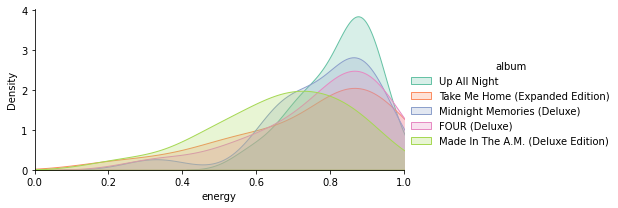

In [36]:
plt.figure(figsize=(10, 12))
ax = sns.FacetGrid(one_D, hue="album",aspect=2, palette='Set2')
#plot all possible kde 
ax.map(sns.kdeplot,'energy',shade= True)
#set lower and upper limits
ax.set(xlim=(0,1))
#add a legend
ax.add_legend()

Text(0, 0.5, 'Energy')

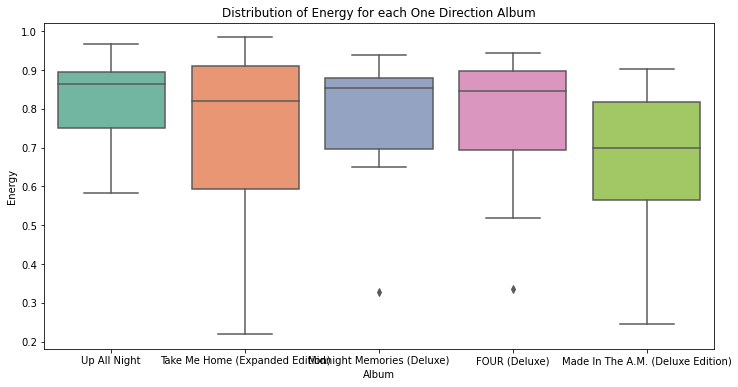

In [37]:
#sns.set_context('notebook')
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='album', y='energy', data=one_D, orient='v',palette='Set2')
ax.set_title('Distribution of Energy for each One Direction Album')

ax.set_xlabel('Album')
ax.set_ylabel('Energy')

### Danceability

<Figure size 720x864 with 0 Axes>

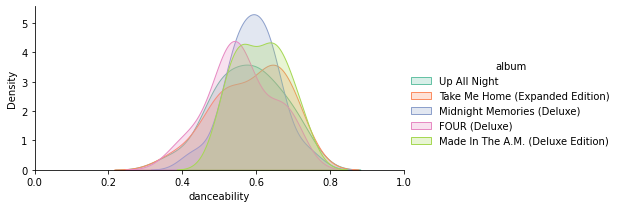

In [38]:
plt.figure(figsize=(10, 12))
ax = sns.FacetGrid(one_D, hue="album",aspect=2, palette='Set2')
#plot all possible kde 
ax.map(sns.kdeplot,'danceability',shade= True)
#set lower and upper limits
ax.set(xlim=(0,1))
#add a legend
ax.add_legend()

Text(0, 0.5, 'Danceability')

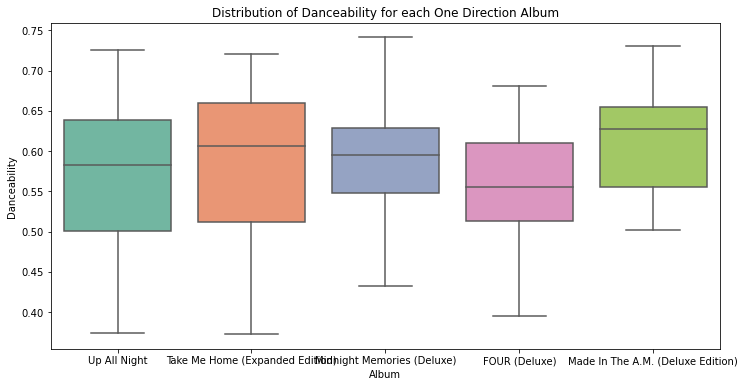

In [39]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='album', y='danceability', data=one_D, orient='v',palette='Set2')
ax.set_title('Distribution of Danceability for each One Direction Album')

ax.set_xlabel('Album')
ax.set_ylabel('Danceability')

### Valence

<Figure size 720x864 with 0 Axes>

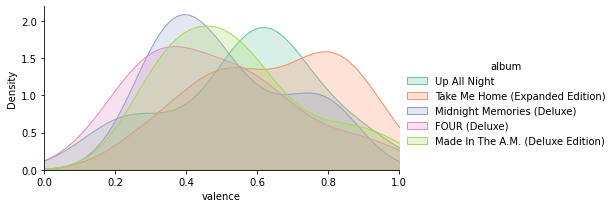

In [40]:
plt.figure(figsize=(10, 12))
ax = sns.FacetGrid(one_D, hue="album",aspect=2, palette='Set2')
#plot all possible kde 
ax.map(sns.kdeplot,'valence',shade= True)
#set lower and upper limits
ax.set(xlim=(0,1))
#add a legend
ax.add_legend()

Text(0, 0.5, 'Valence')

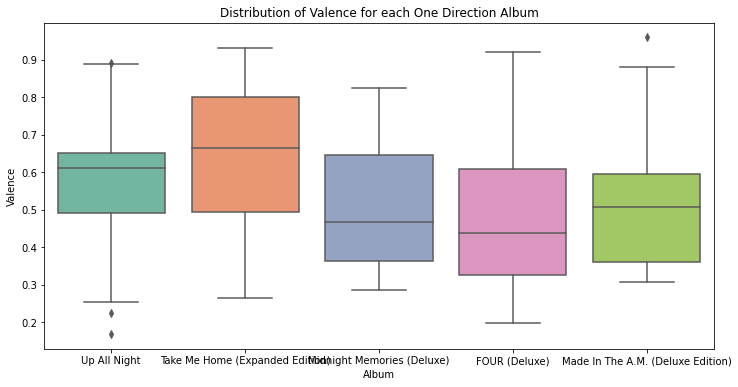

In [41]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x='album', y='valence', data=one_D, orient='v',palette='Set2')
ax.set_title('Distribution of Valence for each One Direction Album')

ax.set_xlabel('Album')
ax.set_ylabel('Valence')

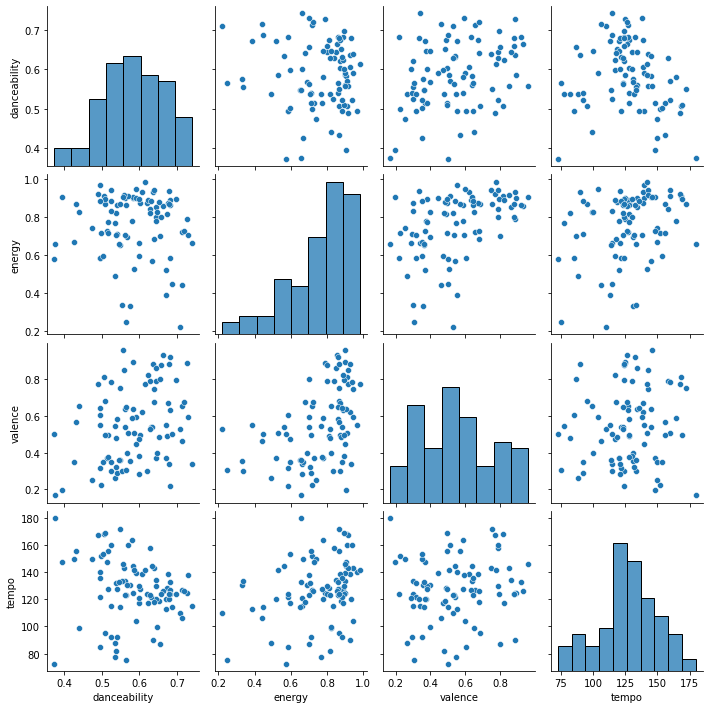

In [42]:
sns.pairplot(one_D)

### Popularity of Tracks

In [43]:
track_info2 = sp.track('3jJ5NJ3aNWvV70Rd7hgZIH')

In [44]:
#track_info2

In [45]:
track_info2['id']

'3jJ5NJ3aNWvV70Rd7hgZIH'

In [46]:
#create function to get track info
def get_track_popularity(id):
    track_info = sp.track(id)
    for track in track_info:
        popularity = track_info['popularity']
        track_id = track_info['id']
        pop_id = [track_id, popularity]
    return pop_id

In [47]:
get_track_popularity('3jJ5NJ3aNWvV70Rd7hgZIH')

['3jJ5NJ3aNWvV70Rd7hgZIH', 61]

In [48]:
tracks_popularity = []
for i in range (len(all_1d_tracks)):
    time.sleep(.5)
    pop_info = get_track_popularity(all_1d_tracks[i])
    tracks_popularity.append(pop_info)

In [49]:
#tracks_popularity

In [50]:
pop_info_df = pd.DataFrame(tracks_popularity, columns = ['track_id', 'popularity'])
pop_info_df.head()

,track_id,popularity
0,4cluDES4hQEUhmXj6TXkSo,81
1,3jJ5NJ3aNWvV70Rd7hgZIH,61
2,5G2c6FsfTzgYUzageCmfXY,71
3,0UAB340gAcSMk3r0a8PTag,63
4,1I93YiKgu2P5pwprWmziPI,62


In [51]:
one_D_pop = all_track_info.merge(pop_info_df, how = 'left', on = 'track_id')

In [52]:
one_D_pop = one_D_pop[['track_id', 'name', 'album','artist', 'danceability', 'energy', 'valence','tempo', 'popularity']]

In [53]:
one_D_pop.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,0.495,0.583,0.603,84.969,61
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,0.713,0.718,0.656,126.999,71
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809,63
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,0.606,0.929,0.622,139.022,62


In [54]:
one_D_pop['Dance100']= one_D_pop['danceability']*100

In [55]:
one_D_pop.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,0.495,0.583,0.603,84.969,61,49.5
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,0.713,0.718,0.656,126.999,71,71.3
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809,63,49.8
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,0.606,0.929,0.622,139.022,62,60.6


In [56]:
one_D_pop['Energy100']= one_D_pop['energy']*100
one_D_pop['Valence100']= one_D_pop['valence']*100

In [57]:
one_D_pop.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,0.495,0.583,0.603,84.969,61,49.5,58.3,60.3
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,0.713,0.718,0.656,126.999,71,71.3,71.8,65.6
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809,63,49.8,71.5,22.5
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,0.606,0.929,0.622,139.022,62,60.6,92.9,62.2


### Correlation of Popularity with Danceability, Energy, adn Valence

<AxesSubplot:xlabel='popularity', ylabel='Dance100'>

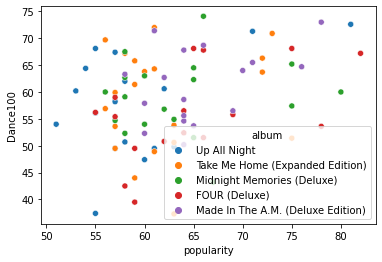

In [58]:
sns.scatterplot(data=one_D_pop, x="popularity", y="Dance100", hue = 'album')

<AxesSubplot:xlabel='popularity', ylabel='Energy100'>

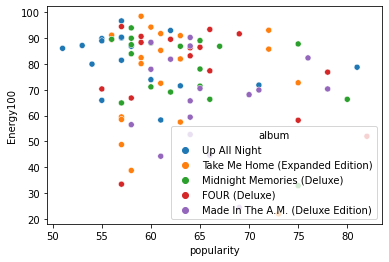

In [59]:
sns.scatterplot(data=one_D_pop, x="popularity", y="Energy100", hue = "album")

<AxesSubplot:xlabel='popularity', ylabel='Valence100'>

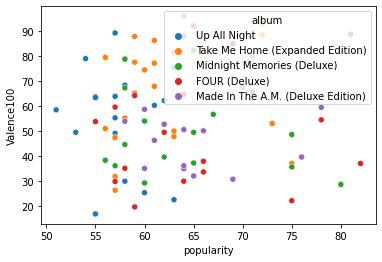

In [60]:
sns.scatterplot(data=one_D_pop, x="popularity", y="Valence100", hue = "album")

### Top Ten Most Popular Songs

In [61]:
pop_sort = one_D_pop.sort_values(by = 'popularity', ascending = False)
pop_sort.head(10)


,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
62,5O2P9iiztwhomNh8xkR9lJ,Night Changes,FOUR (Deluxe),One Direction,0.672,0.520,0.370,120.001,82,67.2,52.0,37.0
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8
39,4nVBt6MZDDP6tRVdQTgxJg,Story of My Life,Midnight Memories (Deluxe),One Direction,0.600,0.663,0.286,121.070,80,60.0,66.3,28.6
73,2K87XMYnUMqLcX3zvtAF4G,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,0.730,0.703,0.595,138.113,78,73.0,70.3,59.5
56,2Bs4jQEGMycglOfWPBqrVG,Steal My Girl,FOUR (Deluxe),One Direction,0.536,0.768,0.545,77.217,78,53.6,76.8,54.5
74,3NLnwwAQbbFKcEcV8hDItk,Perfect,Made In The A.M. (Deluxe Edition),One Direction,0.647,0.823,0.396,99.933,76,64.7,82.3,39.6
38,5T7ZFtCcOgkpjxcuaeZbw0,Best Song Ever,Midnight Memories (Deluxe),One Direction,0.652,0.877,0.486,118.491,75,65.2,87.7,48.6
59,3JjnGLK8IxkNLvo8Lb3KOM,18,FOUR (Deluxe),One Direction,0.681,0.582,0.221,124.038,75,68.1,58.2,22.1
42,2afCBiru10AFckfOa49wIa,You & I,Midnight Memories (Deluxe),One Direction,0.574,0.329,0.356,130.993,75,57.4,32.9,35.6
29,6M31fPFCYB8Job3MCjjrDV,They Don't Know About Us,Take Me Home (Expanded Edition),One Direction,0.514,0.727,0.370,147.917,75,51.4,72.7,37.0


### Most Popular Song on Each Album

In [62]:
#df.sort_values(by=['col1', 'col2'])
sort_by_album = one_D_pop.sort_values(by = ['album','popularity'], ascending = False)

In [63]:
sort_by_album.head(10)

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8
2,5G2c6FsfTzgYUzageCmfXY,One Thing,Up All Night,One Direction,0.713,0.718,0.656,126.999,71,71.3,71.8,65.6
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809,63,49.8,71.5,22.5
4,1I93YiKgu2P5pwprWmziPI,Up All Night,Up All Night,One Direction,0.606,0.929,0.622,139.022,62,60.6,92.9,62.2
1,3jJ5NJ3aNWvV70Rd7hgZIH,Gotta Be You,Up All Night,One Direction,0.495,0.583,0.603,84.969,61,49.5,58.3,60.3
14,3MxJGBnYaP4yQYUv90HLqZ,Moments,Up All Night,One Direction,0.474,0.739,0.253,149.894,60,47.4,73.9,25.3
5,5bODPM8nTwwTIE4W9fuUcC,I Wish,Up All Night,One Direction,0.620,0.872,0.299,124.044,58,62.0,87.2,29.9
7,4K0M12PIWJjA4H0NAP142y,Taken,Up All Night,One Direction,0.507,0.868,0.684,95.035,58,50.7,86.8,68.4
8,5MIMD5WMooNWe8QsMqCrE8,I Want,Up All Night,One Direction,0.674,0.814,0.491,128.092,57,67.4,81.4,49.1
13,147ximWPJObFNQ4M1AhFox,Stand Up,Up All Night,One Direction,0.584,0.900,0.893,125.007,57,58.4,90.0,89.3


In [64]:
#df.drop_duplicates(subset=['brand'])

top_songs = sort_by_album.drop_duplicates(subset = ['album'])

In [65]:
top_songs

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8
29,6M31fPFCYB8Job3MCjjrDV,They Don't Know About Us,Take Me Home (Expanded Edition),One Direction,0.514,0.727,0.370,147.917,75,51.4,72.7,37.0
39,4nVBt6MZDDP6tRVdQTgxJg,Story of My Life,Midnight Memories (Deluxe),One Direction,0.600,0.663,0.286,121.070,80,60.0,66.3,28.6
73,2K87XMYnUMqLcX3zvtAF4G,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,0.730,0.703,0.595,138.113,78,73.0,70.3,59.5
62,5O2P9iiztwhomNh8xkR9lJ,Night Changes,FOUR (Deluxe),One Direction,0.672,0.520,0.370,120.001,82,67.2,52.0,37.0


### Most and Least Danceable Songs

In [66]:
dance_sort1 = one_D_pop.sort_values(by = 'danceability', ascending = False)
dance_sort1.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
44,3cKM7UXBZmgjEgEBTkaIlU,Strong,Midnight Memories (Deluxe),One Direction,0.741,0.663,0.338,115.013,66,74.1,66.3,33.8
73,2K87XMYnUMqLcX3zvtAF4G,Drag Me Down,Made In The A.M. (Deluxe Edition),One Direction,0.730,0.703,0.595,138.113,78,73.0,70.3,59.5
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8
26,6Fe0bY8vDxBnN7rDgu3ACE,I Would,Take Me Home (Expanded Edition),One Direction,0.720,0.725,0.679,126.471,61,72.0,72.5,67.9
83,608R6FvRtAqf2dvgKMzebP,I Want to Write You a Song,Made In The A.M. (Deluxe Edition),One Direction,0.714,0.443,0.463,106.038,61,71.4,44.3,46.3


In [67]:
dance_sort2 = one_D_pop.sort_values(by = 'danceability')
dance_sort2.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
27,6l3vk93IWfe0wq396JTCM6,Over Again,Take Me Home (Expanded Edition),One Direction,0.373,0.575,0.500,72.595,63,37.3,57.5,50.0
10,46qPfZshPjoitCKdKVD6k7,Same Mistakes,Up All Night,One Direction,0.374,0.659,0.168,179.961,55,37.4,65.9,16.8
67,6ibWCCEne6WEqDBAv7BeXv,Clouds,FOUR (Deluxe),One Direction,0.395,0.906,0.196,147.864,59,39.5,90.6,19.6
65,4lrC9aBnzlG9U5DDoHMnyt,Spaces,FOUR (Deluxe),One Direction,0.425,0.668,0.351,149.924,58,42.5,66.8,35.1
41,5wjmqUGN7vrAqFqDWrywlZ,Midnight Memories,Midnight Memories (Deluxe),One Direction,0.432,0.868,0.567,156.128,67,43.2,86.8,56.7


### Highest and Lowest Energy Songs

In [68]:
energy_sort1 = one_D_pop.sort_values(by = 'energy', ascending = False)
energy_sort1.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
34,1fZvvlfjgoqjz7HQKEfzyp,Still The One,Take Me Home (Expanded Edition),One Direction,0.614,0.984,0.776,142.002,59,61.4,98.4,77.6
17,4yVPaA6DOfwbqZIQNv4G5U,I Should Have Kissed You,Up All Night,One Direction,0.495,0.966,0.553,139.931,57,49.5,96.6,55.3
68,2skzofTV9Ys3eN70pghEHL,Change Your Ticket,FOUR (Deluxe),One Direction,0.590,0.944,0.596,103.991,57,59.0,94.4,59.6
21,3lnjFENd7rHxPYM9b964Md,"C'mon, C'mon",Take Me Home (Expanded Edition),One Direction,0.638,0.942,0.745,142.896,60,63.8,94.2,74.5
52,2pFEbA6GdNxBOMn9Egvowm,Why Don't We Go There,Midnight Memories (Deluxe),One Direction,0.523,0.939,0.788,160.019,58,52.3,93.9,78.8


In [69]:
energy_sort2 = one_D_pop.sort_values(by = 'energy')
energy_sort2.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
20,0TAmnCzOtqRfvA38DDLTjj,Little Things,Take Me Home (Expanded Edition),One Direction,0.709,0.220,0.530,110.076,73,70.9,22.0,53.0
77,5CRVwXGikmqzoRO6q7FeAg,If I Could Fly,Made In The A.M. (Deluxe Edition),One Direction,0.565,0.245,0.307,75.055,69,56.5,24.5,30.7
42,2afCBiru10AFckfOa49wIa,You & I,Midnight Memories (Deluxe),One Direction,0.574,0.329,0.356,130.993,75,57.4,32.9,35.6
70,1dD1aarWotVIiFo5gGdMc2,Once in a Lifetime,FOUR (Deluxe),One Direction,0.554,0.335,0.298,133.709,57,55.4,33.5,29.8
35,5lgqMorcT2crsPWiYlgec1,Truly Madly Deeply,Take Me Home (Expanded Edition),One Direction,0.672,0.388,0.552,113.051,58,67.2,38.8,55.2


### Happiest (high valence) and Saddest (low valence) Songs

In [70]:
valence_sort1 = one_D_pop.sort_values(by = 'valence', ascending = False)
valence_sort1.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
85,2Xcvt8NRLw0xbB3ClfW8MI,Temporary Fix,Made In The A.M. (Deluxe Edition),One Direction,0.556,0.902,0.960,145.914,64,55.6,90.2,96.0
18,6Vh03bkEfXqekWp7Y1UBRb,Live While We're Young,Take Me Home (Expanded Edition),One Direction,0.663,0.857,0.931,126.039,72,66.3,85.7,93.1
64,34aYkYrY3sXhEU9O4VQgtB,Fireproof,FOUR (Deluxe),One Direction,0.681,0.864,0.921,132.929,65,68.1,86.4,92.1
13,147ximWPJObFNQ4M1AhFox,Stand Up,Up All Night,One Direction,0.584,0.900,0.893,125.007,57,58.4,90.0,89.3
0,4cluDES4hQEUhmXj6TXkSo,What Makes You Beautiful,Up All Night,One Direction,0.726,0.787,0.888,124.990,81,72.6,78.7,88.8


In [71]:
valence_sort2 = one_D_pop.sort_values(by = 'valence')
valence_sort2.head()

,track_id,name,album,artist,danceability,energy,valence,tempo,popularity,Dance100,Energy100,Valence100
10,46qPfZshPjoitCKdKVD6k7,Same Mistakes,Up All Night,One Direction,0.374,0.659,0.168,179.961,55,37.4,65.9,16.8
67,6ibWCCEne6WEqDBAv7BeXv,Clouds,FOUR (Deluxe),One Direction,0.395,0.906,0.196,147.864,59,39.5,90.6,19.6
59,3JjnGLK8IxkNLvo8Lb3KOM,18,FOUR (Deluxe),One Direction,0.681,0.582,0.221,124.038,75,68.1,58.2,22.1
3,0UAB340gAcSMk3r0a8PTag,More Than This,Up All Night,One Direction,0.498,0.715,0.225,151.809,63,49.8,71.5,22.5
14,3MxJGBnYaP4yQYUv90HLqZ,Moments,Up All Night,One Direction,0.474,0.739,0.253,149.894,60,47.4,73.9,25.3
